In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import matplotlib.ticker as ticker

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"
         }
plt.rcParams.update(params)
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (25,24)  # Adjust figure size as needed

# Load the variables with updated names
folder = '/mnt/extraspace/jesscowell/MarkedCorr/Arrays_for_plotting/'

delta_plotting_5 = np.load(folder +'delta_plotting_5.npy')
mark_fid_min_s8_5 = np.load(folder +'mark_fid_min_s8_5.npy')
mark_fid_max_s8_5 = np.load(folder +'mark_fid_max_s8_5.npy')
mark_fid_max_om_5 = np.load(folder +'mark_fid_max_om_5.npy')
mark_fid_min_om_5 = np.load(folder +'mark_fid_min_om_5.npy')
mark_fid_max_both_5 = np.load(folder +'mark_fid_max_both_5.npy')
mark_fid_min_both_5 = np.load(folder +'mark_fid_min_both_5.npy')
delta_R_train_5 = np.load(folder +'delta_R_train_5.npy')
mark_nodes_5 = np.load(folder +'mean_mark_nodes_5.npy')
mark_fid_5= np.load(folder +'mark_fid_5.npy',)

# Load the variables with updated names
delta_plotting_10 = np.load(folder +'delta_plotting_10.npy')
mark_fid_min_s8_10 = np.load(folder +'mark_fid_min_s8_10.npy')
mark_fid_max_s8_10 = np.load(folder +'mark_fid_max_s8_10.npy')
mark_fid_max_om_10 = np.load(folder +'mark_fid_max_om_10.npy')
mark_fid_min_om_10 = np.load(folder +'mark_fid_min_om_10.npy')
mark_fid_max_both_10 = np.load(folder +'mark_fid_max_both_10.npy')
mark_fid_min_both_10 = np.load(folder +'mark_fid_min_both_10.npy')
delta_R_train_10 = np.load(folder +'delta_R_train_10.npy')
mark_nodes_10 = np.load(folder +'mean_mark_nodes_10.npy')
mark_fid_10 = np.load(folder +'mark_fid_10.npy')

# Load the variables with updated names
delta_plotting_30 = np.load(folder +'delta_plotting_30.npy')
mark_fid_min_s8_30 = np.load(folder +'mark_fid_min_s8_30.npy')
mark_fid_max_s8_30 = np.load(folder +'mark_fid_max_s8_30.npy')
mark_fid_max_om_30 = np.load(folder +'mark_fid_max_om_30.npy')
mark_fid_min_om_30 = np.load(folder +'mark_fid_min_om_30.npy')
mark_fid_max_both_30 = np.load(folder +'mark_fid_max_both_30.npy')
mark_fid_min_both_30 = np.load(folder +'mark_fid_min_both_30.npy')
delta_R_train_30 = np.load(folder +'delta_R_train_30.npy')
mark_nodes_30 = np.load(folder +'mean_mark_nodes_30.npy')
mark_fid_30 = np.load(folder +'mark_fid_30.npy')


marked_field_5= np.load(folder +'marked_field_5.npy')
mark_field_5 = np.load(folder +'mark_field_5.npy')
marked_field_10= np.load(folder +'marked_field_10.npy')
mark_field_10 = np.load(folder +'mark_field_10.npy')
marked_field_30= np.load(folder +'marked_field_30.npy')
mark_field_30 = np.load(folder +'mark_field_30.npy')

# corr_5=np.load('corr_5.npy')
# corr_10=np.load('corr_10.npy')
# corr_30=np.load('corr_30.npy')

colour_arr = ["#beb9db", "#fdcce5", "#8bd3c7"]
length_scale_5=5
  
delta_range_5=[-0.89438789, 18.80326257]    
delta_range_10=[-0.75622187, 4.5550853]
delta_range_30=[-0.37413442,0.45755432]


loaded_data = np.load(folder +'pks_5.npz', allow_pickle=True)
pks_5 = loaded_data['pks'].item()  # Load the dictionary from the saved file
loaded_data = np.load(folder +'pks_10.npz', allow_pickle=True)
pks_10 = loaded_data['pks'].item()  # Load the dictionary from the saved file
k = loaded_data['k']  # Load the array from the saved file
loaded_data = np.load(folder +'pks_30.npz', allow_pickle=True)
pks_30 = loaded_data['pks'].item()  # Load the dictionary from the saved file
k = loaded_data['k']  # Load the array from the saved file


2025-12-10 10:23:50.628776: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/shared/python/3.11.4//lib
2025-12-10 10:23:50.634382: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/shared/python/3.11.4//lib


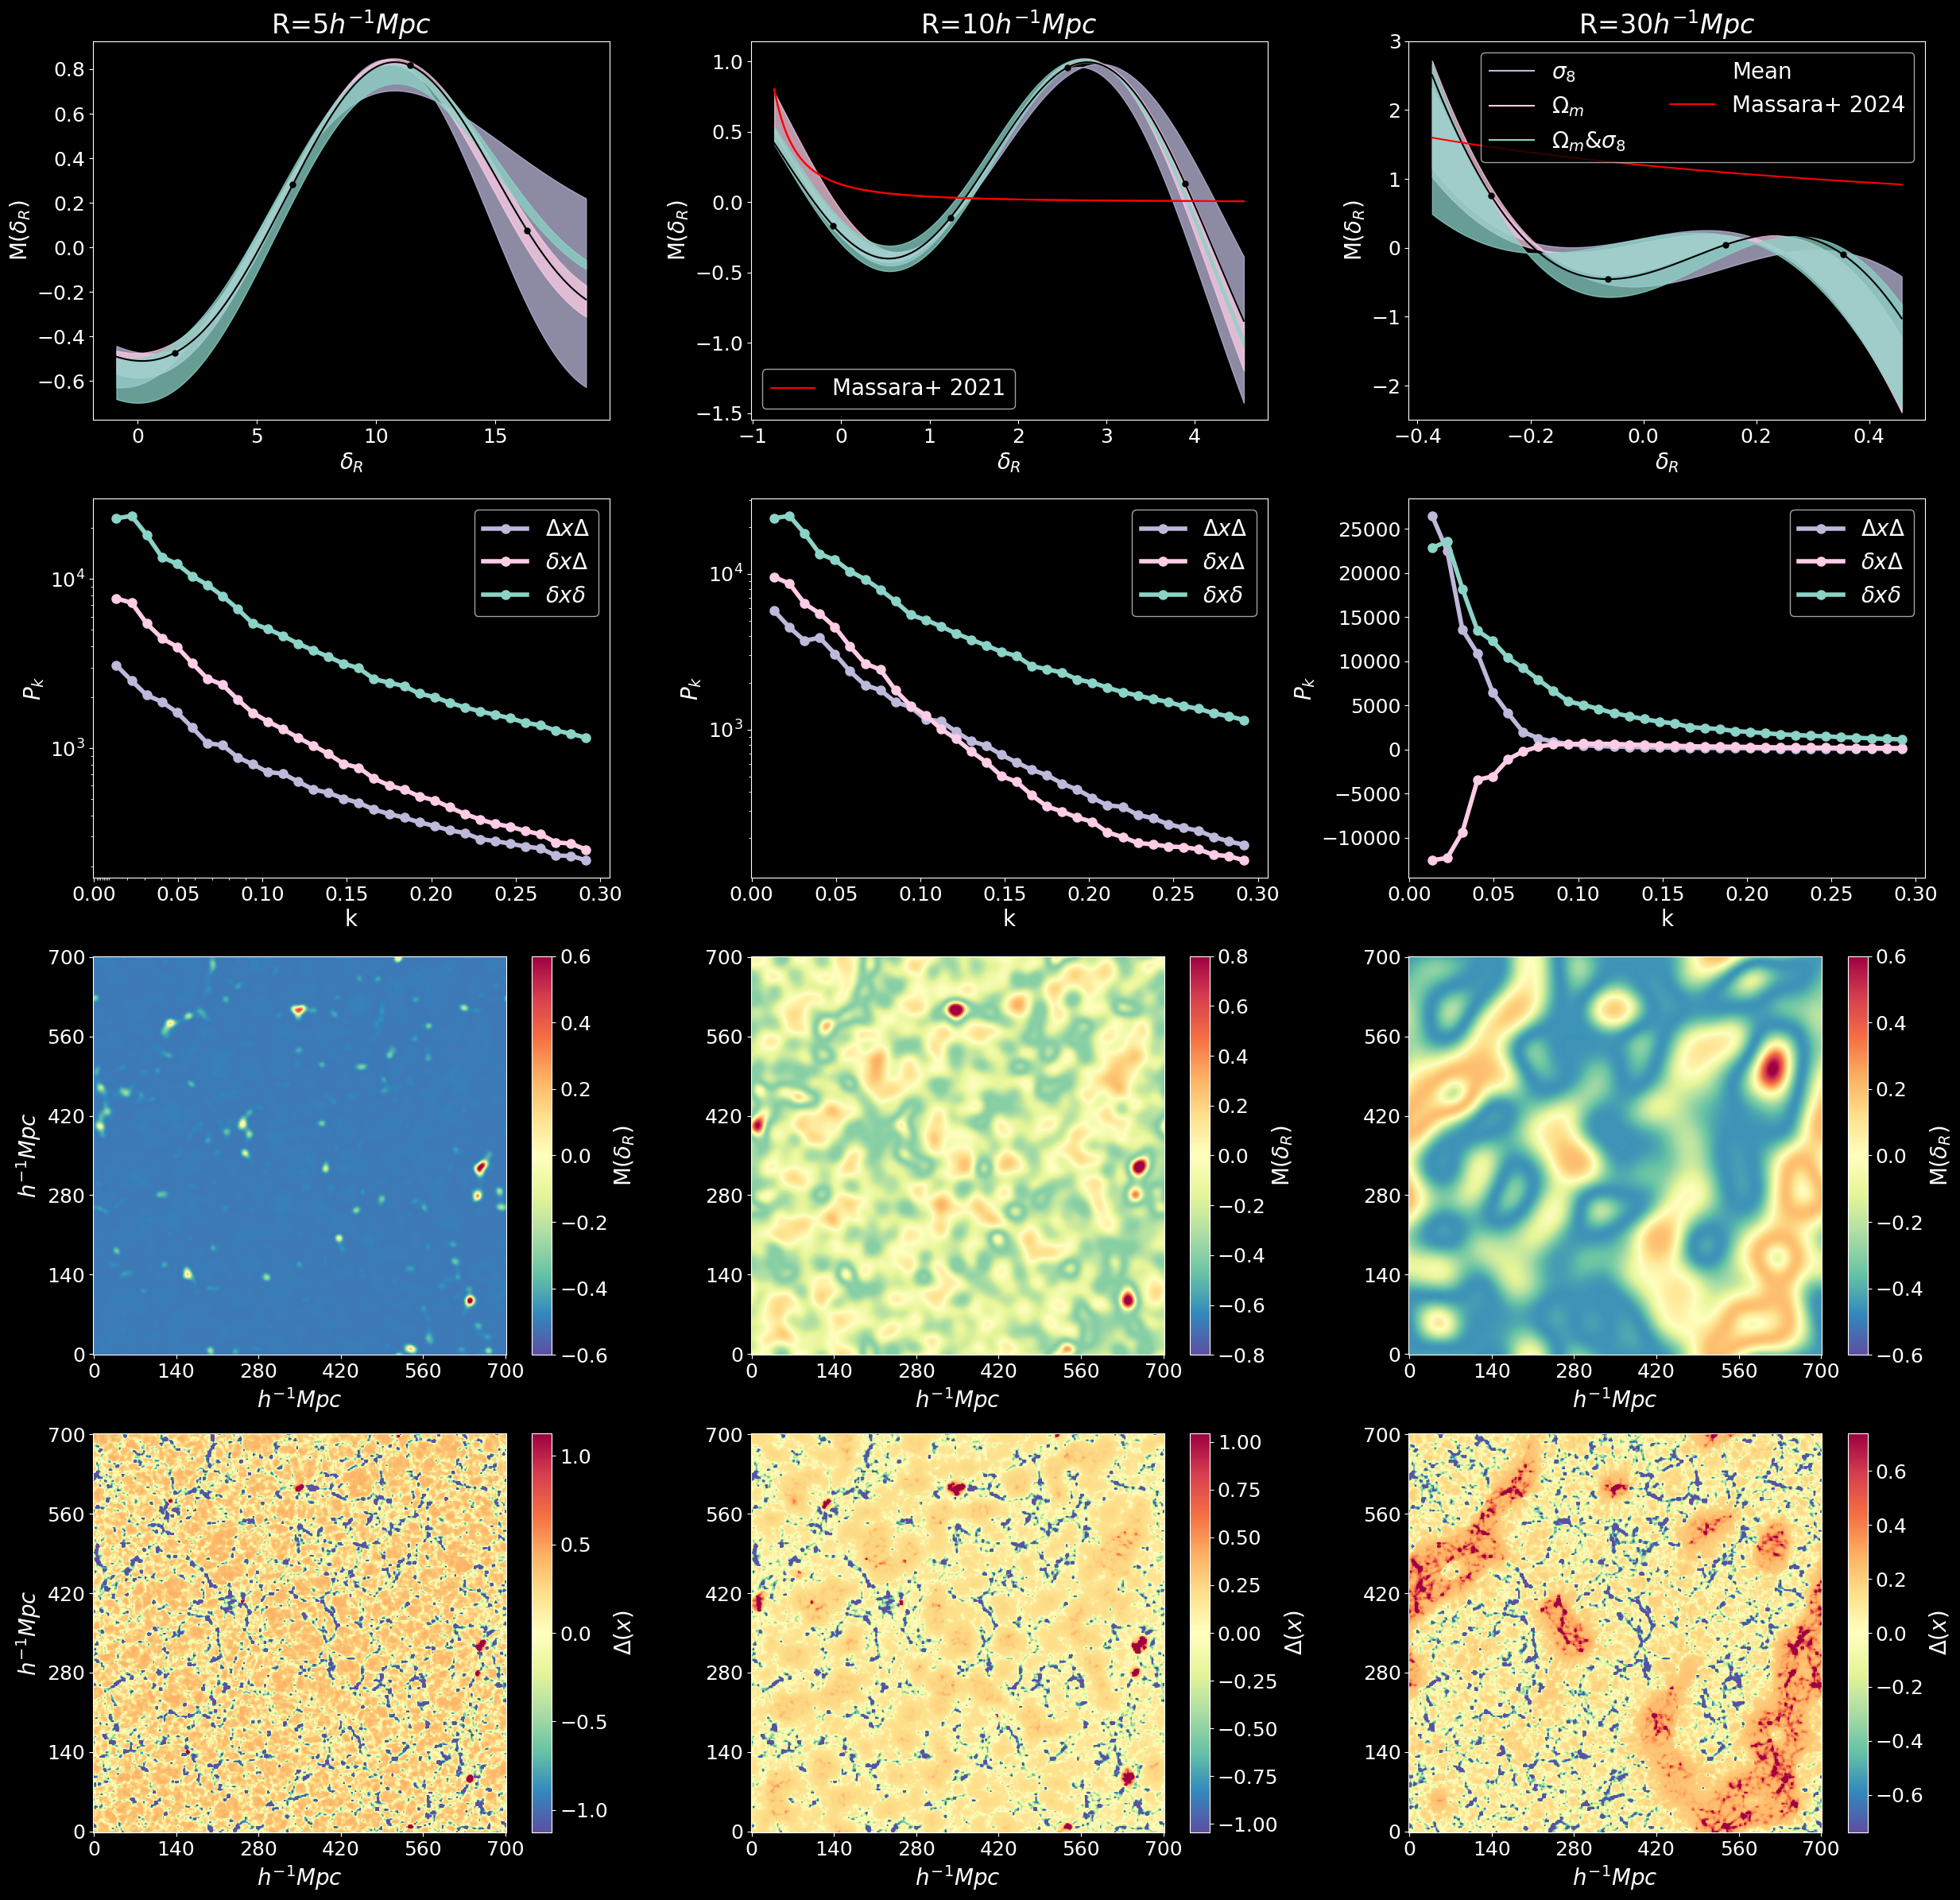

In [2]:

# Function to plot Massara curve
def plot_massara(ax, delta_range, label):
    p = 1
    b = 0.5
    
    delta_plotting = np.linspace(delta_range[0], delta_range[1], 1000) 
    m = (1 + (delta_plotting/(1+b)))**-p
    ax.plot(delta_plotting, 1/10 * m, ls='-', color='red', label=label)



# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 3, gridspec_kw={'height_ratios': [0.95,0.95, 1, 1.],'width_ratios': [1, 1, 1]}, )#sharey='row')

# Add column titles
column_titles = ['R=5$h^{-1}Mpc$', 'R=10$h^{-1}Mpc$','R=30$h^{-1}Mpc$',]
for ax, col in zip(axs[0], column_titles):
    ax.set_title(col, fontsize=24)
    
num_ticks = 6  # Number of ticks you want (including 0 and 700)

# First row: Plot delta plotting
delta_range_5=[-0.89438789, 18.80326257]  
ax = axs[0, 0]
ax.fill_between(delta_plotting_5, mark_fid_min_s8_5, mark_fid_max_s8_5, color=colour_arr[0], alpha=0.75)
ax.fill_between(delta_plotting_5, mark_fid_min_om_5, mark_fid_max_om_5, color=colour_arr[1], alpha=0.75)
ax.fill_between(delta_plotting_5, mark_fid_min_both_5, mark_fid_max_both_5, color=colour_arr[2], alpha=0.75)
# ax.plot([], color=colour_arr[0], label='$\sigma_8$')
# ax.plot([], color=colour_arr[1], label='$\Omega_m$')
# ax.plot([], color=colour_arr[2], label='$\Omega_m & \sigma_8$')
ax.plot(delta_plotting_5, mark_fid_5, color='k', )#label='Mean'

ax.plot(delta_R_train_5, mark_nodes_5, ls='', marker='.', color='black', ms=10)
ax.set_xlabel('$\delta_R$', fontsize=20)
ax.set_ylabel('M($\delta_R$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
# ax.legend(fontsize=20)
delta_range_10=[-0.75622187, 4.5550853]

ax = axs[0, 1]
def plot_massara(ax, delta_range ):
    p = 2
    b = 0.25
    
    delta_plotting = np.linspace(delta_range[0], delta_range[1], 1000) 
    m = (1 + (delta_plotting/(1+b)))**-p
    ax.plot(delta_plotting,1/8*m, ls='-', color='red', label='Massara+ 2021',)
plot_massara(ax, delta_range_10, )

ax.fill_between(delta_plotting_10, mark_fid_min_s8_10, mark_fid_max_s8_10, color=colour_arr[0], alpha=0.75)
ax.fill_between(delta_plotting_10, mark_fid_min_om_10, mark_fid_max_om_10, color=colour_arr[1], alpha=0.75)
ax.fill_between(delta_plotting_10, mark_fid_min_both_10, mark_fid_max_both_10, color=colour_arr[2], alpha=0.75)
# ax.plot([], color=colour_arr[0], label='$\sigma_8$')
# ax.plot([], color=colour_arr[1], label='$\Omega_m$')
# ax.plot([], color=colour_arr[2], label='$\Omega_m & \sigma_8$')
ax.plot(delta_plotting_10, mark_fid_10, color='k', )
ax.plot(delta_R_train_10, mark_nodes_10, ls='', marker='.', color='black', ms=10)

ax.set_xlabel('$\delta_R$', fontsize=20)
ax.set_ylabel('M($\delta_R$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=20)
plot_massara(ax, delta_range_10, )

ax = axs[0, 2]
ax.fill_between(delta_plotting_30, mark_fid_min_s8_30, mark_fid_max_s8_30, color=colour_arr[0], alpha=0.75)
ax.fill_between(delta_plotting_30, mark_fid_min_om_30, mark_fid_max_om_30, color=colour_arr[1], alpha=0.75)
ax.fill_between(delta_plotting_30, mark_fid_min_both_30, mark_fid_max_both_30, color=colour_arr[2], alpha=0.75)
ax.plot([], color=colour_arr[0], label='$\sigma_8$')
ax.plot([], color=colour_arr[1], label='$\Omega_m$')
ax.plot([], color=colour_arr[2], label='$\Omega_m & \sigma_8$')
ax.plot(delta_plotting_30, mark_fid_30, color='k', label='Mean')
ax.plot(delta_R_train_30, mark_nodes_30, ls='', marker='.', color='black', ms=10)

delta_range_30=[-0.37413442,0.45755432]  
# Function to plot Massara curve
def plot_massara(ax, delta_range, label):
    p = 1
    b = 0.5
    
    delta_plotting = np.linspace(delta_range[0], delta_range[1], 1000) 
    m = (1 + (delta_plotting/(1+b)))**-p
    ax.plot(delta_plotting, 1.2*m, ls='-', color='red', label=label)

plot_massara(ax, delta_range_30, "Massara+ 2024")
ax.set_xlabel('$\delta_R$', fontsize=20)
ax.set_ylim(-2.5,3)
ax.set_ylabel('M($\delta_R$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=20, loc='upper right',ncol=2)


# Second row: Plot power spectra

ax = axs[1, 0]
ax.plot(k, pks_5['Pk_m1m1_fiducial'], 'o-', ms=8,lw=4, label='$Δ x Δ$', color=colour_arr[0])
ax.plot(k, -pks_5['Pk_m1d_fiducial'], 'o-', ms=8,lw=4, label='$δ x Δ$', color=colour_arr[1])
ax.plot(k, pks_5['Pk_dd_fiducial'],'o-', ms=8, lw=4, label='$δ x δ$', color=colour_arr[2])
ax.legend(fontsize=20)
ax.set_xlabel('k', fontsize=20)
ax.set_ylabel('$P_{k}$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_yscale('log')

# Add minor ticks for more granularity (optional)
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

# Optionally enable grid
# ax.grid(True, which="both", ls="--", color='gray', linewidth=0.5)

ax = axs[1, 1]
ax.plot(k, pks_10['Pk_m1m1_fiducial'],'o-', ms=8,lw=4,  label='$Δ x Δ$', color=colour_arr[0])
ax.plot(k, -pks_10['Pk_m1d_fiducial'],'o-', ms=8,lw=4,  label='$δ x Δ$', color=colour_arr[1])
ax.plot(k, pks_10['Pk_dd_fiducial'], 'o-', ms=8,lw=4,label='$δ x δ$', color=colour_arr[2])
ax.legend(fontsize=20)
ax.set_xlabel('k', fontsize=20)
ax.set_ylabel('$P_{k}$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
# ax.set_xscale('log')
ax.set_yscale('log')
# ax.grid(True, which="both", ls="--", color='gray', linewidth=0.5)

ax = axs[1, 2]
ax.plot(k, pks_30['Pk_m1m1_fiducial'],'o-', ms=8,lw=4, label='$Δ x Δ$', color=colour_arr[0])
ax.plot(k, -pks_30['Pk_m1d_fiducial'],'o-', ms=8,lw=4, label='$δ x Δ$', color=colour_arr[1])
ax.plot(k, pks_30['Pk_dd_fiducial'],'o-', ms=8,lw=4, label='$δ x δ$', color=colour_arr[2])
ax.legend(fontsize=20)
ax.set_xlabel('k', fontsize=20)
ax.set_ylabel('$P_{k}$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
# ax.set_xscale('log')
# ax.grid(True, which="both", ls="--", color='gray', linewidth=0.5)

# Third row: Plot marked fields
ax = axs[2, 0]
im = ax.imshow(mark_field_5[200, :, :], vmax=0.6,vmin=-0.6,cmap='Spectral_r', aspect='auto', origin='lower')

ax.set_xlabel('$h^{-1}Mpc$', fontsize=20)
ax.set_ylabel('$h^{-1}Mpc$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

ticks = np.linspace(0, mark_field_5.shape[1] - 1, num_ticks)
tick_labels = np.linspace(0, 700, num_ticks).astype(int)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=18)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=18)

cbar = plt.colorbar(im, ax=ax, label='M($\delta_R(x)$)')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(f'M($\delta_R$)',size=20)

ax = axs[2, 1]
im = ax.imshow(mark_field_10[200, :, :], vmin=-0.8, vmax=0.8, cmap='Spectral_r', aspect='auto', origin='lower')# vmin=-1, vmax=1,

ax.set_xlabel('$h^{-1}Mpc$', fontsize=20)
# ax.set_ylabel('$h^{-1}Mpc$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

ticks = np.linspace(0, mark_field_10.shape[1] - 1, num_ticks)
tick_labels = np.linspace(0, 700, num_ticks).astype(int)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=18)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=18)

cbar = plt.colorbar(im, ax=ax, label='M($\delta_R(x)$)')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(f'M($\delta_R$)',size=20)

ax = axs[2, 2]
im = ax.imshow(mark_field_30[200, :, :],  vmax=0.6, vmin=-0.6,cmap='Spectral_r', aspect='auto', origin='lower')#vmin=-1, vmax=1,

ax.set_xlabel('$h^{-1}Mpc$', fontsize=20)
# ax.set_ylabel('$h^{-1}Mpc$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

ticks = np.linspace(0, mark_field_30.shape[1] - 1, num_ticks)
tick_labels = np.linspace(0, 700, num_ticks).astype(int)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=18)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=18)

cbar = plt.colorbar(im, ax=ax, label='M($\delta_R(x)$)')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(f'M($\delta_R$)',size=20)

# Fourth row: Plot marked fields (10 and 30)
ax = axs[3, 0]
im = ax.imshow(marked_field_5[200, :, :],  vmin=np.mean(marked_field_5)-np.std(marked_field_5) , vmax=np.mean(marked_field_5)+np.std(marked_field_5) , origin='lower', cmap='Spectral_r', aspect='auto')

ax.set_xlabel('$h^{-1}Mpc$', fontsize=20)
ax.set_ylabel('$h^{-1}Mpc$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

ticks = np.linspace(0, marked_field_5.shape[1] - 1, num_ticks)
tick_labels = np.linspace(0, 700, num_ticks).astype(int)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=18)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=18)

cbar = plt.colorbar(im, ax=ax, label='$\Delta(x)$')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(f'$\Delta(x)$',size=20)

ax = axs[3, 1]
im = ax.imshow(marked_field_10[200, :, :], vmin=np.mean(marked_field_10)-np.std(marked_field_10) , vmax=np.mean(marked_field_10)+np.std(marked_field_10), origin='lower', cmap='Spectral_r', aspect='auto')

ax.set_xlabel('$h^{-1}Mpc$', fontsize=20)
# ax.set_ylabel('$h^{-1}Mpc$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

ticks = np.linspace(0, marked_field_10.shape[1] - 1, num_ticks)
tick_labels = np.linspace(0, 700, num_ticks).astype(int)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=18)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=18)

cbar = plt.colorbar(im, ax=ax, label='$\Delta(x)$')

cbar.ax.tick_params(labelsize=18)
cbar.set_label(f'$\Delta(x)$',size=20)

ax = axs[3, 2]
im = ax.imshow(marked_field_30[200, :, :], vmin=np.mean(marked_field_30)-np.std(marked_field_30) , vmax=np.mean(marked_field_30)+np.std(marked_field_30), origin='lower', cmap='Spectral_r', aspect='auto')

ax.set_xlabel('$h^{-1}Mpc$', fontsize=20)
# ax.set_ylabel('$h^{-1}Mpc$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

ticks = np.linspace(0, marked_field_30.shape[1] - 1, num_ticks)
tick_labels = np.linspace(0, 700, num_ticks).astype(int)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=18)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=18)
ax.sharex(axs[3,2])
cbar = plt.colorbar(im, ax=ax, label='$\Delta(x)$')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(f'$\Delta(x)$', size=20)

plt.tight_layout()
# plt.savefig('paper_plots/grid_plot.pdf')
plt.savefig('paper_plots/grid_plot.png')
plt.show()
